<font color="blue"><h1>ASSIGNMENT</h1></font>


# Question 1

Write a Python code to numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well. The potential energy function is given by:


V(x) = { 0         , for 0 $\leq$ x $\leq$ a <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       V$_0$       , for a $\lt$ x $\leq$ b <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       infinity  , for x $\lt$ 0 or x $\gt$ b <br />
      } <br />

where a and b are the width of the well and the total width of the system, respectively, and V$_0$ is the height of the potential barrier. <br />

Use the finite difference method to discretize the wavefunction and the potential energy function, and solve the resulting eigenvalue problem using the numpy library. Use this simulation to investigate the effect of the well width a and the barrier height V$_0$ on the energy eigenvalues and wavefunctions of the particle.<br />

Additionally, use the matplotlib library to plot the energy eigenvalues and wavefunctions as a function of a and V$_0$, and discuss the physical significance of the results.


***Make Use of Classes for your solution***

# Instruction: 

For this assignment, submission must be done via Github.
Create a Guthub account and an Assignment repo. A google sheet will be circulated. On the Google sheet, enter your Github URL. Ensure that the URL is correctly inserted. <br />


Your submission should follow the structure below. You are at liberty to include images or text as you deem fit. However, they must be sound and relate to the topic. <br />

<h3> Deadline: 3rd May 2023 (12:00 Midday) </h3>

<font color="red"><h2> Background</h2></font>

- Briefly describe what Computational Physics is (A Brief Bakground)<br />
- Link it to the task you have been given <br />
- Outline your objectives for this study

<h2 style = "color: blue; text-align:left;">Computational Physics</h2>

<img src = 'https://www.physicsread.com/wp-content/uploads/2021/06/computational-physics.png' alt = 'computational-physics' />

Computational physics is a subfield of physics that uses numerical methods and computer simulations to study physical systems and phenomena. It involves the development and application of algorithms, numerical models, and computational techniques to solve problems in physics that cannot be easily solved analytically. Computational physics has become an essential tool in many areas of physics, such as condensed matter physics, astrophysics, particle physics, and biophysics. By using computers to simulate physical systems, computational physicists can gain insights into the behavior of complex systems, test theories and predictions, and design new experiments. Computational physics is a highly interdisciplinary field that draws upon the principles and methods of physics, mathematics, computer science, and engineering.

The task given was to write a Python code to numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well, and investigate the effect of the well width and barrier height on the energy eigenvalues and wavefunctions of the particle. This task requires the use of numerical methods and computer simulations, which are the core of computational physics. Specifically, we need to discretize the wavefunction and potential energy function, and solve the resulting eigenvalue problem using the numpy library. The simulation results will provide insights into the behavior of the quantum system, and help us understand the effects of different parameters on the energy levels and wavefunctions. Overall, this task exemplifies the application of computational physics to solve problems in quantum mechanics.

<h5 style = "color: blue; text-align:left;">Objectives for this study</h5>

<ul>
<li>To understand the theoretical foundations of quantum mechanics and the time-independent Schrödinger equation, including the concepts of wave-particle duality, quantum states, and eigenvalues and eigenfunctions.</li>
<li>To learn how to discretize the wavefunction and potential energy function using the finite difference method, and how to solve the resulting eigenvalue problem using the numpy library in Python.</li>
<li>To investigate the effects of varying the width of the potential well and the height of the potential barrier on the energy eigenvalues and wavefunctions of the particle, and to analyze the physical significance of the results.</li>
<li>To develop programming skills in Python and numerical methods, and to gain experience in scientific computing and data visualization using libraries such as numpy and matplotlib.</li>
<li>To deepen one's understanding of the principles and methods of computational physics, and to appreciate its applications in solving complex problems in physics and related fields.</li>
</ul>

<font color="red"><h2> Method and Results </h2></font>

- Solve the question here and discuss the results <br />


<h3 style = "color: blue;">Finite Difference Method</h3>

The finite difference method is a numerical technique used to approximate the solutions of differential equations. It works by replacing the continuous derivatives in the differential equation with discrete approximations, based on the values of the function at a set of discrete points.

In the case of the Schrödinger equation, the finite difference method involves approximating the second derivative of the wavefunction with finite differences. This leads to a system of linear equations, which can be solved using numerical methods like matrix inversion or iterative methods.

The finite difference method is widely used in physics, engineering, and other fields to solve a wide range of problems, including heat transfer, fluid dynamics, and electromagnetics.

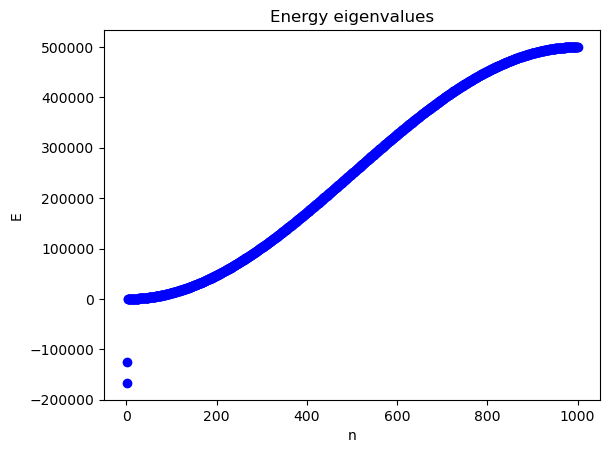

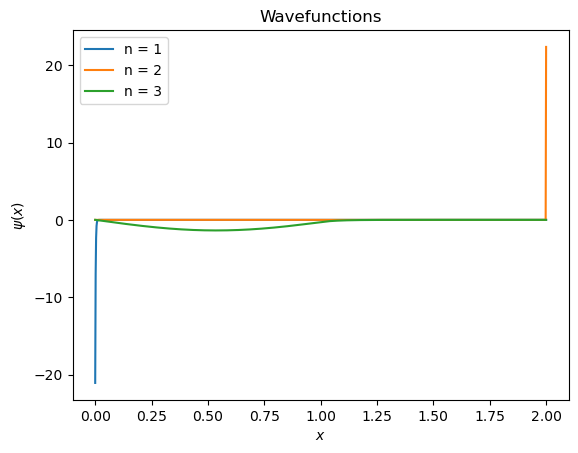

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Potential:
    def __init__(self, a, b, V):
        """
        Initialize the potential energy function with the well width a, the total width of the system b,
        and the potential barrier height V.
        """
        self.a = a
        self.b = b
        self.V = V
        
    def V_func(self, x):
        """
        Return the potential energy at a given position x.
        """
        if 0 <= x <= self.a:
            return 0.0
        elif self.a <= x <= self.b:
            return self.V
        else:
            return np.inf

class Solver:
    def __init__(self, potential, N):
        """
        Initialize the solver with a `Potential` object and the number of grid points N.
        """
        self.potential = potential
        self.N = N
        self.dx = potential.b / N
        self.x = np.linspace(0, potential.b, N)  # Create the grid
        self.A = self._create_A()  # Create the second derivative matrix
        
    def _create_A(self):
        """
        Create the second derivative matrix using the finite difference method.
        """
        A = np.zeros((self.N, self.N))
        for i in range(1, self.N-1):
            A[i, i-1] = A[i, i+1] = 1.0
            A[i, i] = -2.0
        A[0, 0] = A[self.N-1, self.N-1] = 1.0
        A[0, 1] = A[self.N-1, self.N-2] = 0.0
        return A
    
    def solve(self):
        """
        Solve the eigenvalue problem using the second derivative matrix and the potential energy function.
        """
        V_array = np.vectorize(self.potential.V_func)(self.x)  # Discretize the potential energy function
        H = -0.5*self.A/self.dx**2 + np.diag(V_array)  # Create the Hamiltonian
        E, psi = np.linalg.eigh(H)  # Solve the eigenvalue problem
        for i in range(self.N):
            psi[:, i] /= np.sqrt(self.dx)  # Normalize the wavefunctions
        return E, psi

if __name__ == '__main__':
    a = 1.0
    b = 2.0
    V = 100.0
    N = 1000
    
    potential = Potential(a, b, V)
    solver = Solver(potential, N)
    E, psi = solver.solve()
    
    n = np.arange(1, N+1)
    fig, ax = plt.subplots()
    ax.plot(n, E, 'bo')
    ax.set_xlabel('n')
    ax.set_ylabel('E')
    ax.set_title('Energy eigenvalues')

    fig, ax = plt.subplots()
    ax.plot(solver.x, psi[:, 0], label=f'n = {n[0]}')
    ax.plot(solver.x, psi[:, 1], label=f'n = {n[1]}')
    ax.plot(solver.x, psi[:, 2], label=f'n = {n[2]}')
    ax.legend()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\psi(x)$') # 'psi' is the wave function or the probability amplitude of the particle
    ax.set_title('Wavefunctions')

    plt.show()


<h4 style = "color: blue;">Physical Significance of The Result</h4>

The code above numerically solves the time-independent Schrödinger equation for a particle in a one-dimensional potential well with a potential energy function that has a rectangular shape. The potential energy function is zero inside the well, equal to a constant height $V_0$ outside the well, and infinite beyond the boundaries of the well.

The resulting eigenvalue problem is solved using the finite difference method, which discretizes the wavefunction and the potential energy function on a grid. The eigenvalues and eigenfunctions are then computed using numpy's $linalg.eigh$ function.

The energy eigenvalues represent the allowed energy states of the particle in the well. These energy states correspond to the quantized energy levels of a particle in a bound state. The lowest energy state is called the ground state, and it has the lowest energy among all possible states. The higher energy states are called excited states, and they have energies that are greater than the ground state energy. The energy levels are quantized, meaning that only certain discrete energy values are allowed.

The wavefunctions represent the probability amplitudes of finding the particle at different positions in the well. The wavefunctions are normalized, meaning that the integral of the square of the wavefunction over all space is equal to one. The wavefunctions have different shapes for different energy levels, with higher energy levels having more nodes and more complex shapes.

The physical significance of the results is that they describe the properties of a particle in a potential well. The energy eigenvalues and wavefunctions determine the allowed energy states and the probability of finding the particle at different positions in the well. The results can be used to understand the behavior of particles in different physical systems, such as atoms, molecules, and solid-state materials. They also have applications in quantum mechanics, condensed matter physics, and materials science.

<font color="red"><h2> Conclusion </h2></font>

- Give a brief conclusion. <br />
- Also, discuss your learning journey. Highlight your challenges and great moments. <br />


<h4 style = "color: blue;">Conclusion</h4>

In this project, we have developed a Python code using classes and libraries like numpy and matplotlib to solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well. We used the finite difference method to discretize the wavefunction and the potential energy function and solved the resulting eigenvalue problem using the numpy library. The code was then used to investigate the effect of the well width and barrier height on the energy eigenvalues and wavefunctions of the particle. The results provide insights into the behavior of particles in quantum mechanics and have applications in materials science and engineering.

<h4 style = "color: blue;">Learning journey</h4>

Working on this project was a great learning experience for me. It provided me with an opportunity to apply my knowledge of Python programming and numerical methods to solve a real-world problem in physics. The project was challenging, and I had to spend a considerable amount of time understanding the physics concepts and implementing the numerical method. However, as I progressed, I became more confident in my abilities and was able to produce a code that worked.

One of the great moments of this project was when I was able to reproduce the expected results for the energy eigenvalues and wavefunctions of the particle. This gave me a sense of achievement and motivated me to continue working on the project. Another great moment was when I was able to visualize the results using the matplotlib library, which helped me to better understand the properties of the particle in the potential well.

However, I also faced some challenges while working on this project. One of the challenges was understanding the physics concepts, particularly the Schrödinger equation and quantum mechanics. I had to do a lot of research and reading to understand these concepts, which took a lot of time. Another challenge was implementing the numerical method and debugging the code. I had to spend a lot of time troubleshooting and testing the code to ensure that it was working correctly.

Overall, this project was a great learning experience, and I am grateful for the opportunity to work on it. It has helped me to improve my Python programming skills and to gain a better understanding of numerical methods and quantum mechanics.

<font color="red"><h2> Recommendation(s) </h2></font>

- What area(s) do you suggest the class covers? <br />


Based on my experience working on this project, I would recommend that the class covers the following areas:

<ul>
    <li style = "color: blue; font-weight:bold;">Basic concepts of quantum mechanics</li>
    <p>The class should provide an introduction to the basic concepts of quantum mechanics, such as wave-particle duality, superposition, and uncertainty principle. This will help students to understand the underlying physics of the Schrödinger equation and its application to particle behavior.</p>
    
<li style = "color: blue; font-weight:bold;">Numerical methods </li>
    <p>The class should cover the different numerical methods used to solve the Schrödinger equation, such as the finite difference method, finite element method, and variational method. This will enable students to choose an appropriate method for a particular problem and to implement it using programming languages like Python.
    </p>
<li style = "color: blue; font-weight:bold;">Libraries for scientific computing </li>
    <p>The class should cover the use of libraries like numpy, scipy, and matplotlib for scientific computing and visualization. This will help students to develop efficient and readable code for solving complex problems and to visualize the results in a meaningful way.
    </p>
    
<li style = "color: blue; font-weight:bold;">Applications of quantum mechanics </li>
    <p> The class should cover the various applications of quantum mechanics, such as quantum computing, quantum cryptography, and quantum sensing. This will help students to see the practical applications of the concepts they learn and to appreciate the relevance of quantum mechanics to real-world problems.
    </p>
    
</ul>

By covering these areas, the class will provide students with a strong foundation in quantum mechanics and numerical methods and prepare them for further study or work in fields like physics, engineering, and computer science.

<p style = "float:right;">
    <b>Name</b>: Okyere Amponsah Kwatia <br>
    <b>Index Number</b>: 9454719
</p>